In [1]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
from keras import applications
from keras.models import Model
train_data_dir = 'F:/Project/Hobe/train'
validation_data_dir = 'F:/Project/Hobe/val'

Using TensorFlow backend.


In [2]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32
img_width, img_height = 150, 150

# automagically retrieve images and their classes for train and validation sets
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Found 203 images belonging to 2 classes.
Found 99 images belonging to 2 classes.


In [24]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_height,img_width, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [1]:
import tensorflow
print(tensorflow.__version__)

1.2.0


In [25]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [9]:
print(model.summary)

<bound method Container.summary of <keras.models.Sequential object at 0x000000659234EB38>>


In [26]:
epochs = 20
train_samples = 203
validation_samples = 99

In [27]:
model.fit_generator(
        train_generator,
        steps_per_epoch=train_samples // batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_samples// batch_size,)

Epoch 1/20
6/6 [==============================] - 14s - loss: 0.6995 - acc: 0.5802 - val_loss: 0.6760 - val_acc: 0.7761
Epoch 2/20
6/6 [==============================] - 13s - loss: 0.6748 - acc: 0.5573 - val_loss: 0.5937 - val_acc: 0.8657
Epoch 3/20
6/6 [==============================] - 11s - loss: 0.6699 - acc: 0.6332 - val_loss: 0.6303 - val_acc: 0.7164
Epoch 4/20
6/6 [==============================] - 12s - loss: 0.6462 - acc: 0.6544 - val_loss: 0.4951 - val_acc: 0.8209
Epoch 5/20
6/6 [==============================] - 12s - loss: 0.4454 - acc: 0.8366 - val_loss: 0.6976 - val_acc: 0.7015
Epoch 6/20
6/6 [==============================] - 12s - loss: 0.5741 - acc: 0.7412 - val_loss: 0.4334 - val_acc: 0.7761
Epoch 7/20
6/6 [==============================] - 12s - loss: 0.3539 - acc: 0.8313 - val_loss: 0.4195 - val_acc: 0.8209
Epoch 8/20
6/6 [==============================] - 12s - loss: 0.2981 - acc: 0.8855 - val_loss: 0.8409 - val_acc: 0.7015
Epoch 9/20
6/6 [========================

1/1 [==============================] - 0s
[[  2.12037048e-05]]


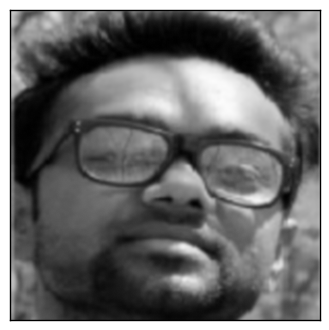

In [45]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input
#img = load_img('F:/Project/Hobe/test')  # this is a PIL image
img = load_img('C:/Users/AP/Desktop/(1) Ittihad Udoy - Google Chrome.jpg', target_size=(150,150))

x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict_classes(x)
prob = model.predict_proba(x)
print(prob) 
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()


In [21]:
top_model_weights_path = 'weights.h5'


In [27]:
model.load_weights("weights.h5")

In [1]:
import cv2
print(cv2.__version__)

3.1.0


In [38]:
import glob
from skimage.color import rgb2gray
from skimage.io import imread, imsave
from skimage.filters import threshold_otsu
from skimage import img_as_uint

for filename in glob.glob("F:/Project/Hobe/train *.jpg"):
    inp_image = imread(filename)
    img_gray = rgb2gray(inp_image)

    thresh = threshold_otsu(img_gray)
    binary_thresh_img = img_gray & gt; thresh

    imsave("F:/Grayscale", img_as_uint(binary_thresh_img))